In [12]:
import nbimporter

In [13]:
from pinn_temp import TemperaturePinn, interpolate
from pinn_stokes import StokesPinn
from pinn import BasePinn
import matplotlib.pyplot as plt
import numpy as np

In [14]:
pinn = BasePinn(num_outputs=1)
pinn_temp = TemperaturePinn()
pinn_stokes = StokesPinn()

In [15]:
def to_cpu(x):
    return x.detach().cpu().numpy()

In [22]:
x, y = pinn_temp.sample_inflow(64)
x, y = to_cpu(x), np.squeeze(to_cpu(y))

scatter = plt.scatter(x[:, 0], x[:, 1], c=y)
plt.colorbar(scatter)
plt.xlim(to_cpu(pinn_temp.domain[0]))
plt.ylim(to_cpu(pinn_temp.domain[1]))
plt.title("inflow boundary conditions")
plt.show()

AttributeError: 'StokesPinn' object has no attribute 'sample_inflow'

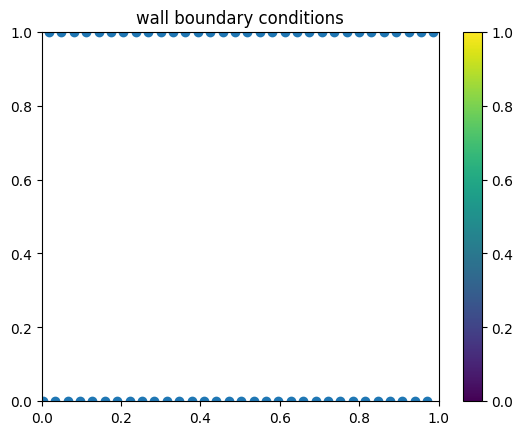

In [17]:
x = to_cpu(pinn.sample_wall_points(64))

scatter = plt.scatter(x[:, 0], x[:, 1])
plt.colorbar(scatter)
plt.xlim(to_cpu(pinn_temp.domain[0]))
plt.ylim(to_cpu(pinn_temp.domain[1]))
plt.title("wall boundary conditions")
plt.show()

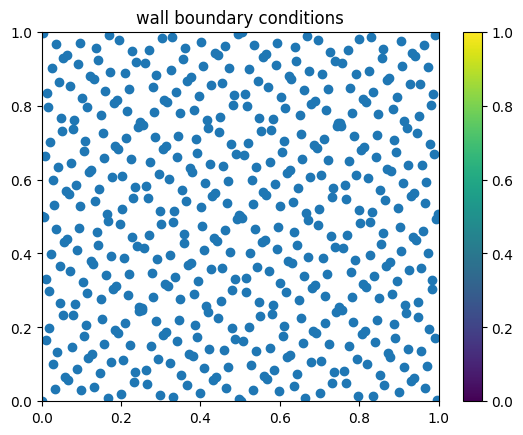

In [18]:
x = to_cpu(pinn.sample_interior_points(512))

scatter = plt.scatter(x[:, 0], x[:, 1])
plt.colorbar(scatter)
plt.xlim(to_cpu(pinn_temp.domain[0]))
plt.ylim(to_cpu(pinn_temp.domain[1]))
plt.title("wall boundary conditions")
plt.show()

In [19]:
num_x, num_y = 100, 100

x = np.arange(0 + 0.5 / num_x, 1.0, 1.0 / num_x)
y = np.arange(0 + 0.5 / num_y, 1.0, 1.0 / num_y)
X, Y = np.meshgrid(x, y)
XY = np.array([X.flatten(), Y.flatten()]).T

In [20]:

u_x = np.loadtxt("./formatted_data99/results-99.h5_vel_0.out").reshape(num_x, num_y)
u_y = np.loadtxt("./formatted_data99/results-99.h5_vel_1.out").reshape(num_x, num_y)
u = np.stack([u_x, u_y], -1)

p_map = np.loadtxt("./formatted_data99/powermap.out").reshape(num_x, num_y)

In [23]:
x, y = pinn_stokes.sample_boundary()
x, y = to_cpu(x), np.squeeze(to_cpu(y))

scatter = plt.scatter(x[:, 0], x[:, 1], c=y)
plt.colorbar(scatter)
plt.xlim(to_cpu(pinn_temp.domain[0]))
plt.ylim(to_cpu(pinn_temp.domain[1]))
plt.title("inflow boundary conditions")
plt.show()

NameError: name 'pinn_stkoes' is not defined